In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [31]:
df = pd.read_csv("ThreeForthSemester.csv")
df

,SHLT,BMI,MSTOT,COGTOT,INHPFN,HHHRES,HCHILD,LIVSIB,HAIRA,HATOTB,IEARN,HITOT,PRPCNT,group
0,5.0,33.0,14.0,17.0,0.0,2.0,4.0,0.0,0.0,0.0,20000.0,22400.0,0.0,"0,0,0,0,0"
1,4.0,23.8,8.0,14.0,0.0,2.0,6.0,2.0,0.0,15000.0,25000.0,107000.0,1.0,"0,0,0,0,0"
2,3.0,26.0,15.0,27.0,0.0,2.0,2.0,1.0,40000.0,290000.0,103000.0,134384.0,1.0,"0,0,0,0,0"
3,4.0,40.7,11.0,16.0,0.0,3.0,4.0,7.0,0.0,16477.0,62000.0,72157.0,0.0,"0,0,0,0,0"
4,3.0,22.8,15.0,31.0,0.0,4.0,4.0,4.0,4000.0,138300.0,15000.0,95660.0,1.0,"0,0,0,0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,4.0,39.6,14.0,23.0,0.0,2.0,5.0,6.0,0.0,27500.0,27000.0,29112.0,0.0,"1,0,0,0,0"
33534,1.0,18.4,14.0,27.0,0.0,5.0,6.0,5.0,0.0,90000.0,0.0,0.0,1.0,"1,0,0,0,0"
33535,1.0,26.9,9.0,25.0,0.0,2.0,7.0,7.0,0.0,2341.0,3295.0,3295.0,1.0,"1,0,0,0,0"
33536,4.0,29.3,13.0,23.0,0.0,3.0,3.0,7.0,0.0,0.0,18000.0,18000.0,0.0,"1,0,0,0,0"


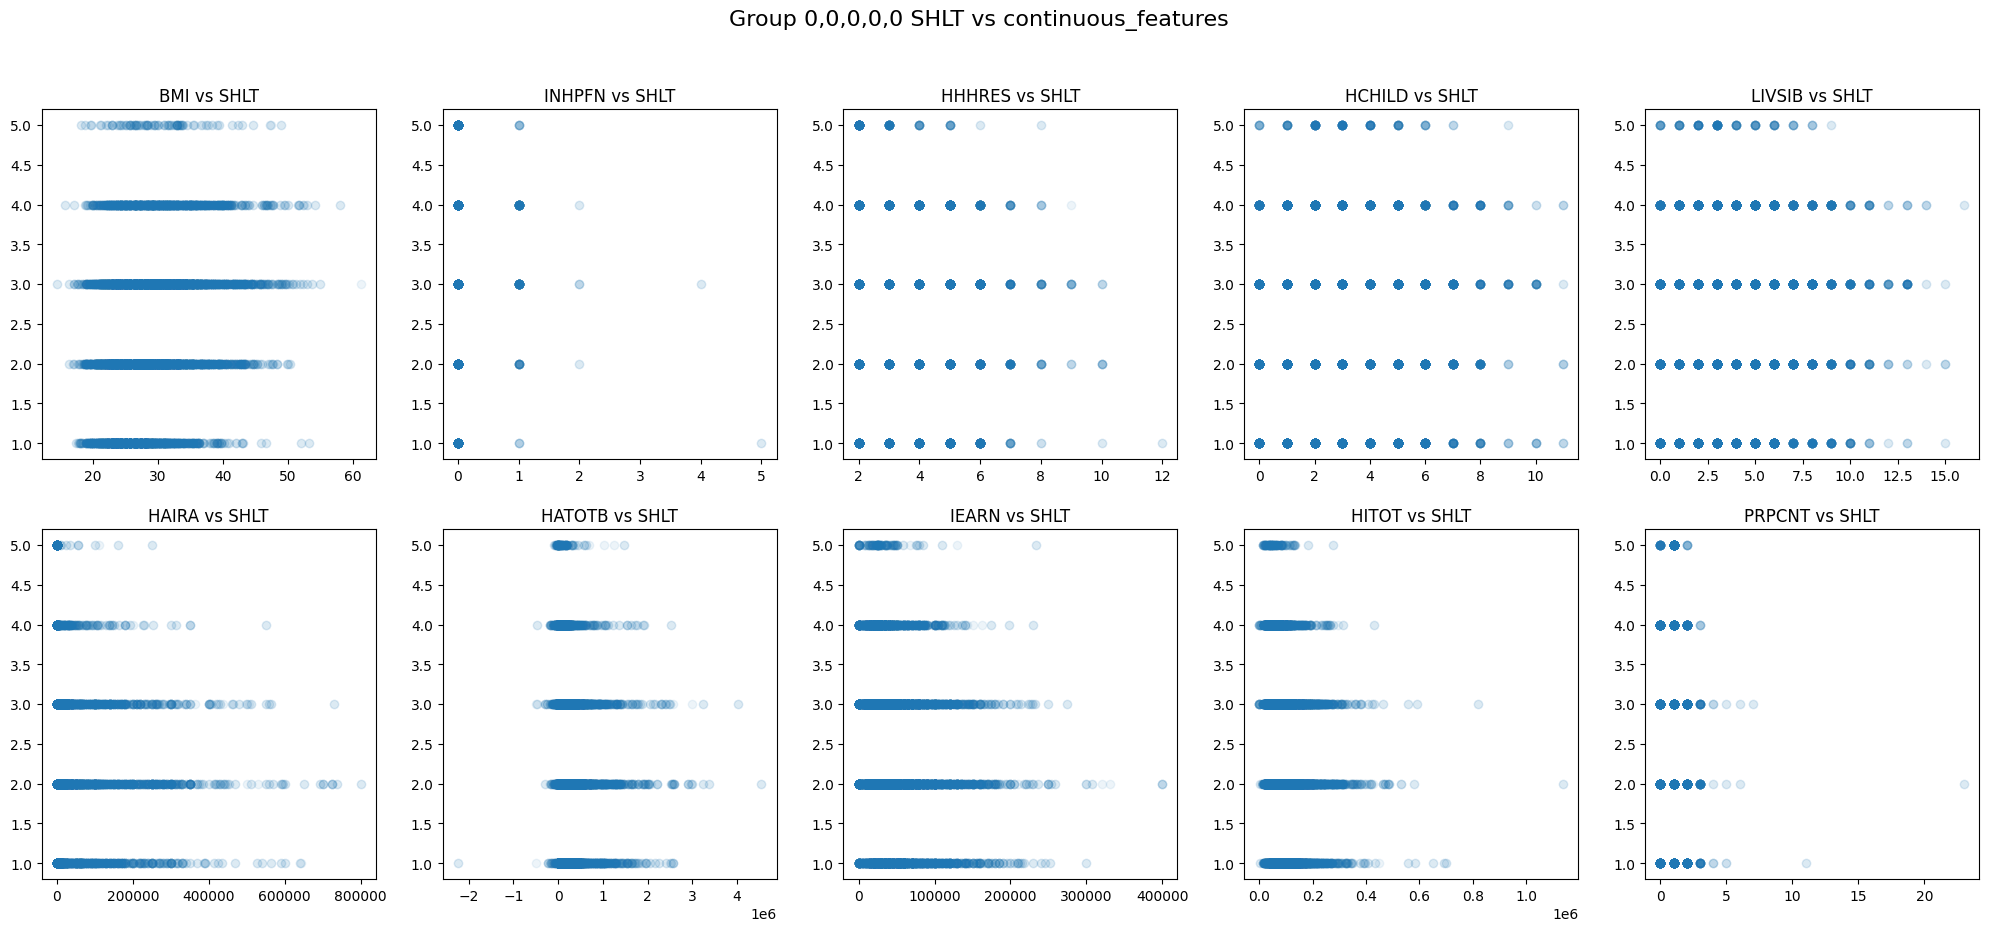

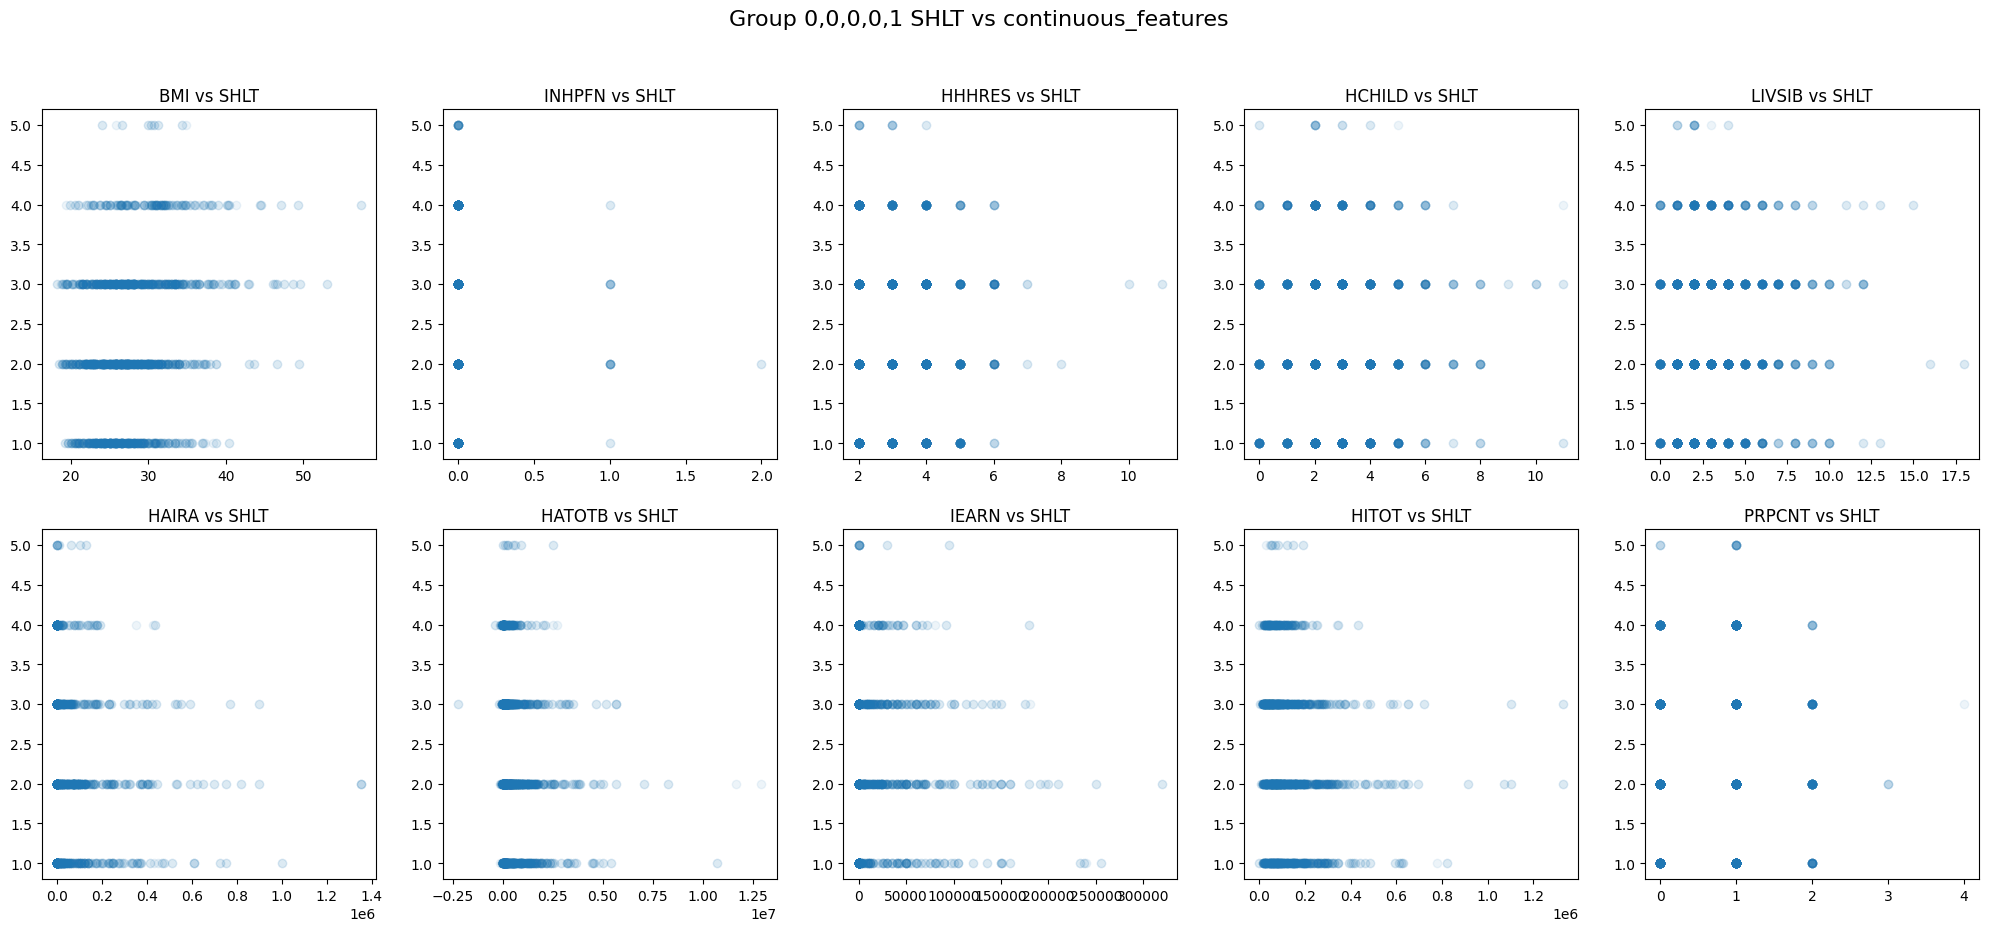

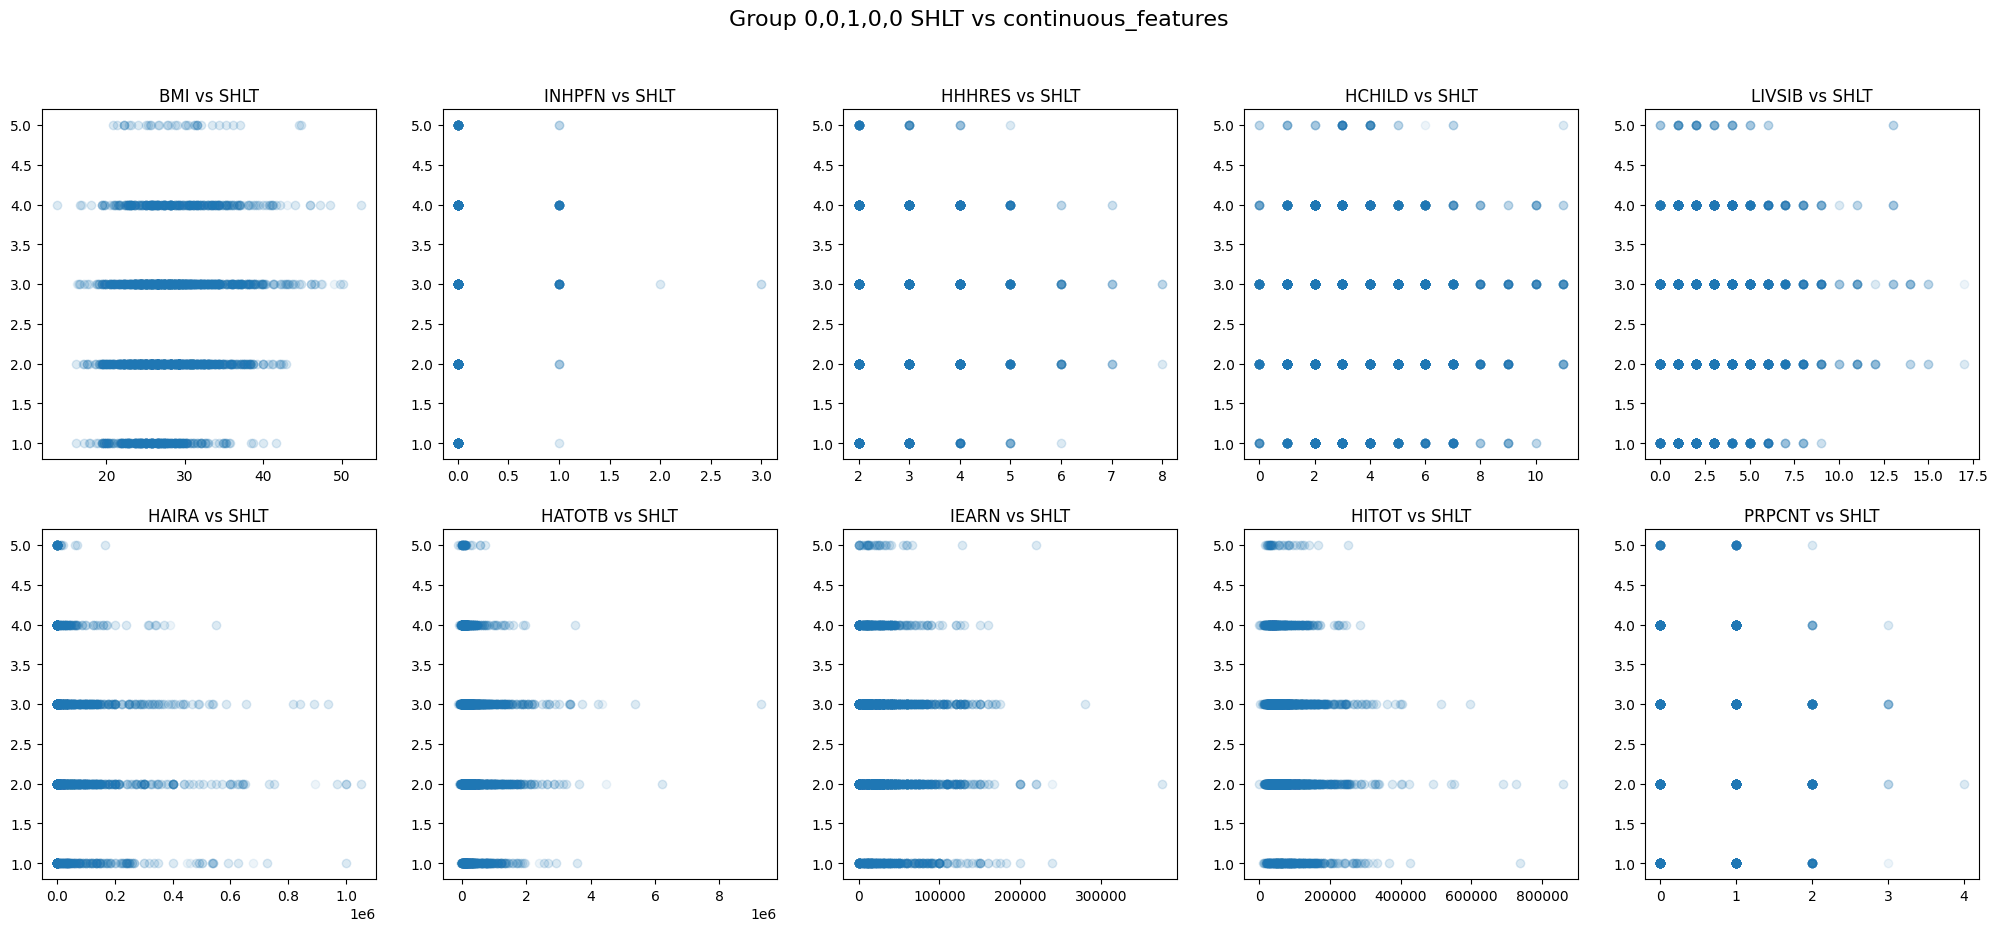

KeyboardInterrupt: 

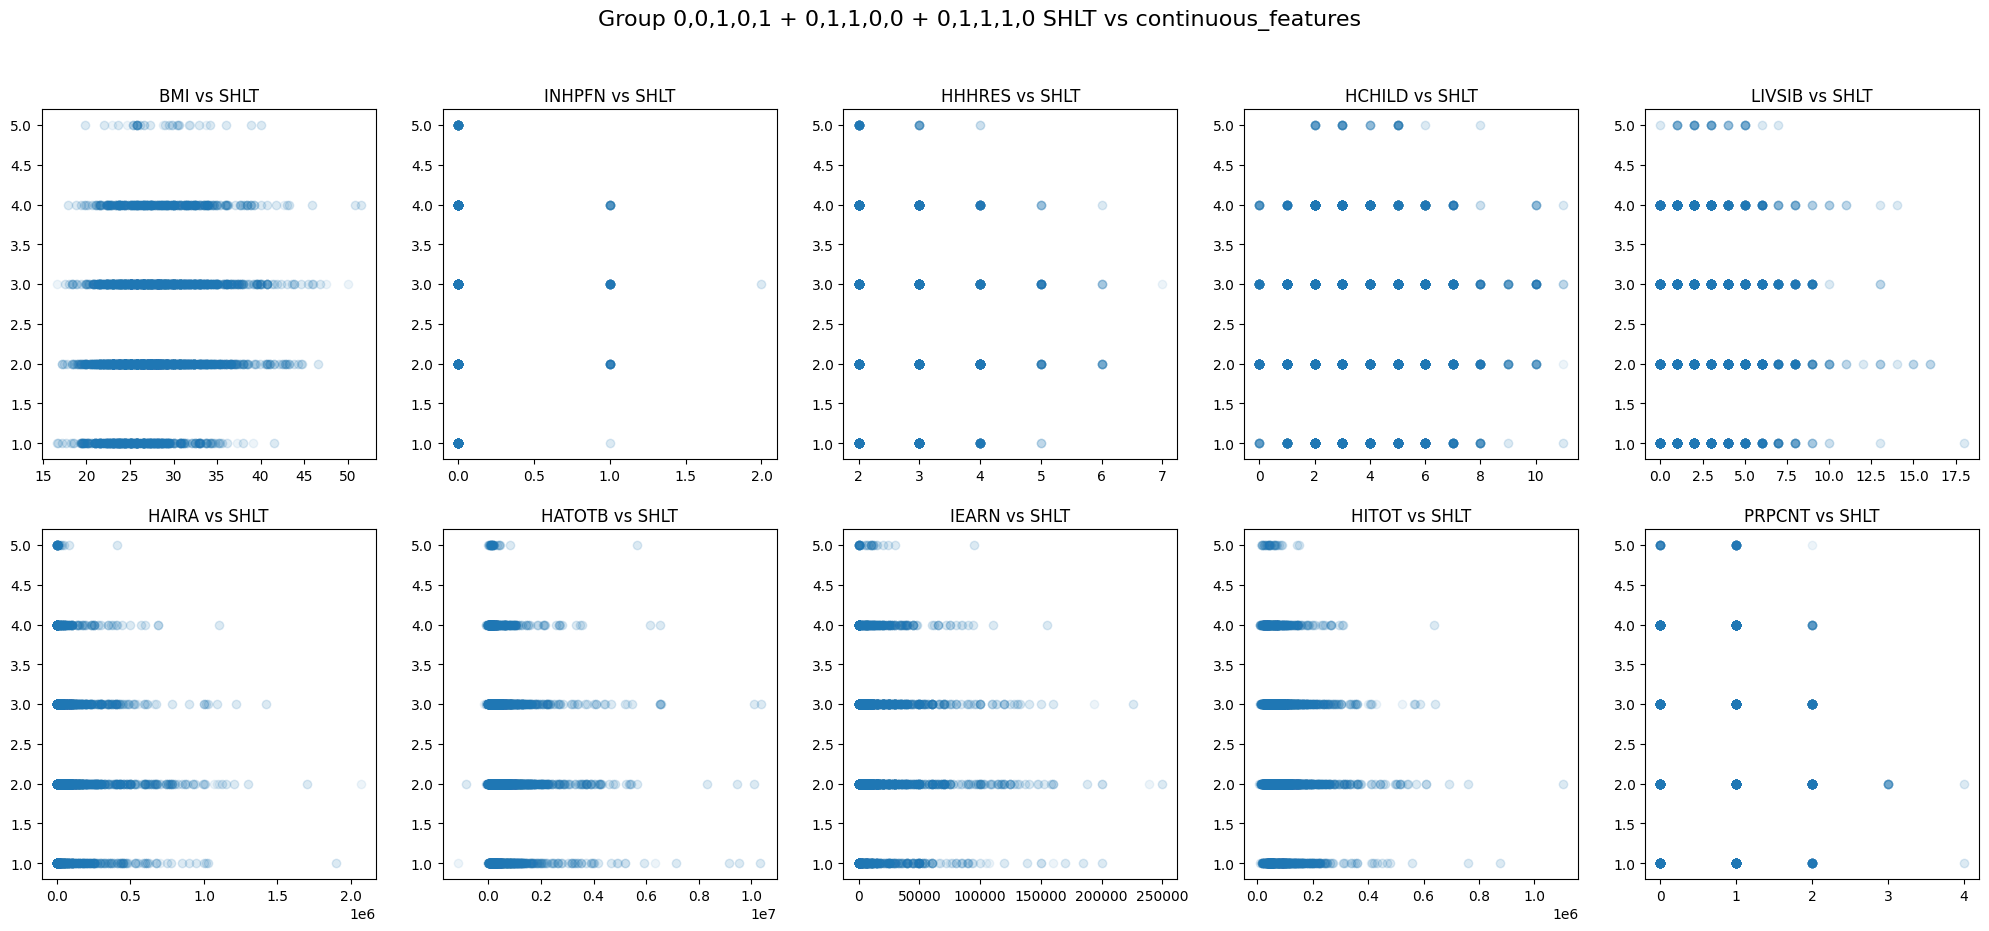

In [32]:
continuous_features = ['BMI', 'INHPFN',  'HHHRES', 'HCHILD','LIVSIB',  'HAIRA', 'HATOTB', 'IEARN','HITOT', 'PRPCNT']
target = ["SHLT","MSTOT","COGTOT"]

groups = df.group.unique()


for t in target:
    for group in groups:
        group_df = df[df.group == group]
        fig, ax = plt.subplots(2,5, figsize=(25,10))
        i = 0
        for row in range(2):
            for col in range(5):
                ax[row, col].scatter(group_df[continuous_features[i]], group_df[t], alpha = 0.08)
                ax[row, col].set_title(continuous_features[i]+" vs " + t)
                fig.suptitle('Group ' + str(group) + ' ' + t + ' vs '+ "continuous_features", fontsize=16)
                i += 1
        plt.savefig('scatterplots\Group ' + str(group) + ' ' + t + ' vs '+ "continuous_features")
        plt.show()

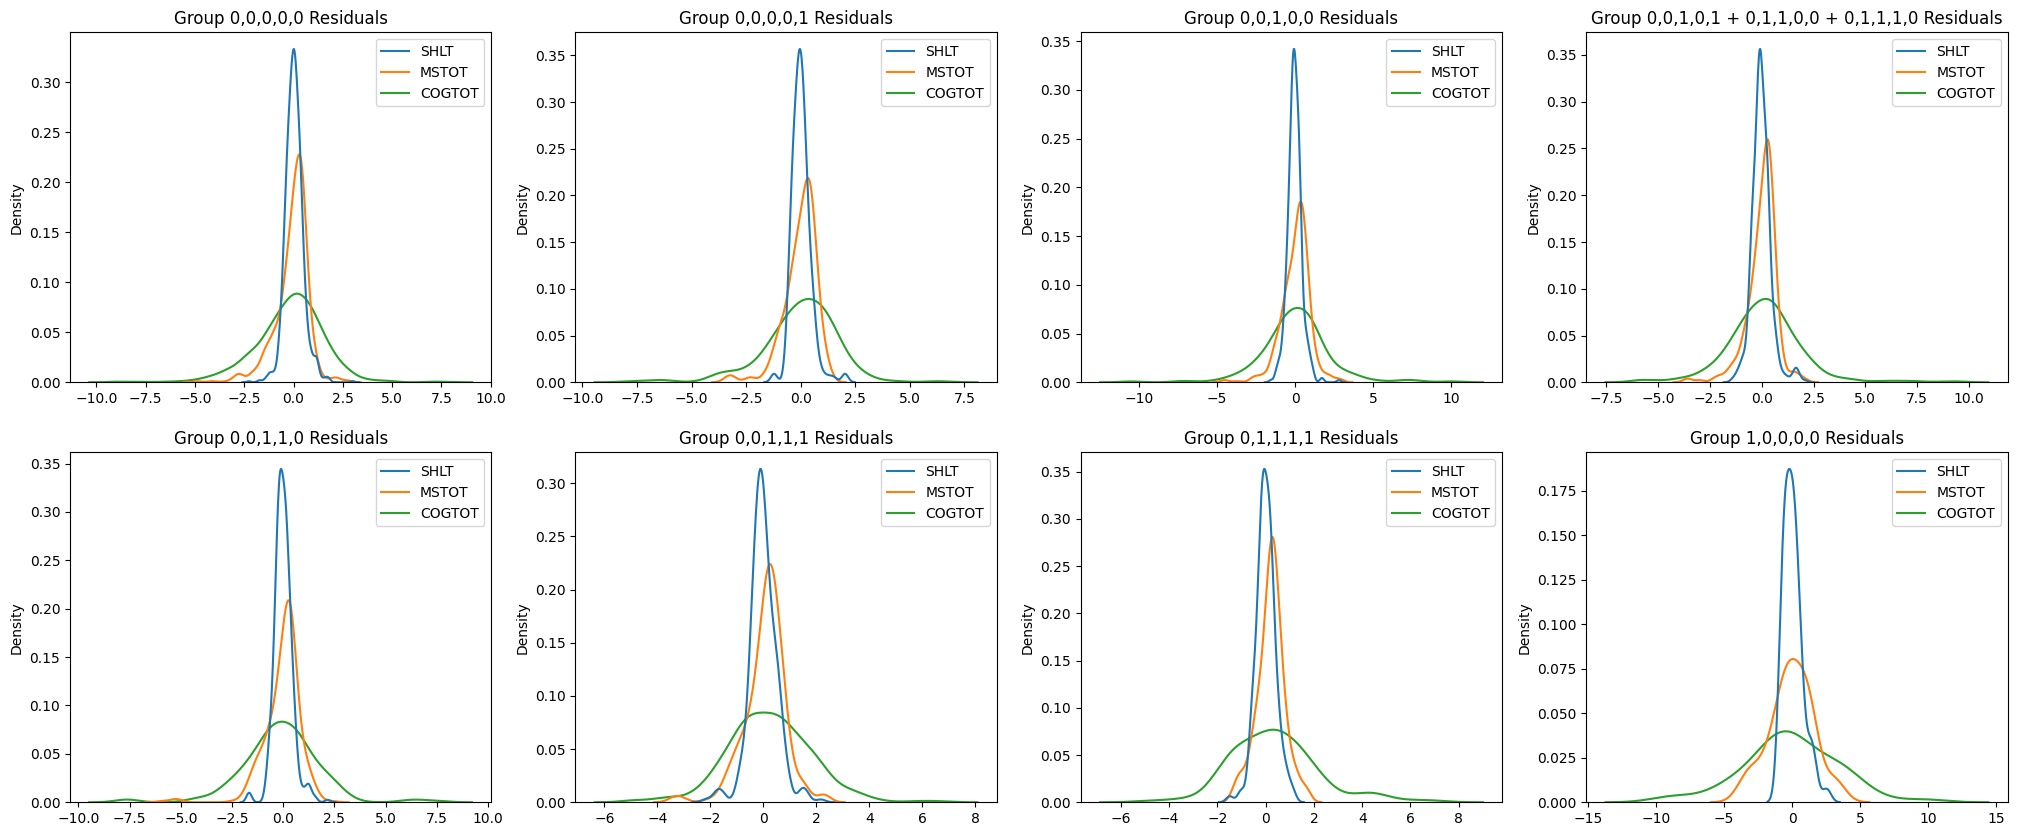

In [33]:
df = pd.read_csv("ThreeForthSemester_StandardExceptTarget.csv")
target = ["SHLT","MSTOT","COGTOT"]

groups = df.group.unique()

fig, ax = plt.subplots(2,4, figsize=(25,10))
i = 0
for group in groups:
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    group_df = df[df.group == group]
    X = group_df.drop(target+["group"], axis=1)
    y = group_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    rf.fit(X_train, y_train)

    row = i // 4
    col = i % 4
    sns.kdeplot(y_test - rf.predict(X_test), ax=ax[row][col])
    ax[row][col].set_title("Group " + str(group) + " Residuals")
    i += 1
plt.show()